In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("C:\\Users\\HP\\Downloads")

In [4]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df=pd.get_dummies(data=df,columns=['Geography','Gender'],drop_first=True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [13]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model= Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
history=model.fit(x_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.3369 - val_accuracy: 0.8587 - val_loss: 0.3395
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8678 - loss: 0.3290 - val_accuracy: 0.8631 - val_loss: 0.3390
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.3242 - val_accuracy: 0.8619 - val_loss: 0.3389
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8731 - loss: 0.3201 - val_accuracy: 0.8600 - val_loss: 0.3391
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8620 - loss: 0.3302 - val_accuracy: 0.8619 - val_loss: 0.3386
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.3278 - val_accuracy: 0.8600 - val_loss: 0.3399
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8605 - loss: 0.3351 - val_accuracy: 0.8587 - val_loss: 0.3408
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8718 - loss: 0.3278 - val_accu

In [32]:
y_pred=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


In [33]:
y_pred

array([[0.02921425],
       [0.08915067],
       [0.04849133],
       ...,
       [0.01078221],
       [0.02732971],
       [0.44786692]], dtype=float32)

In [34]:
y_pred=y_pred.argmax(axis=-1)

In [35]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
score

0.7925

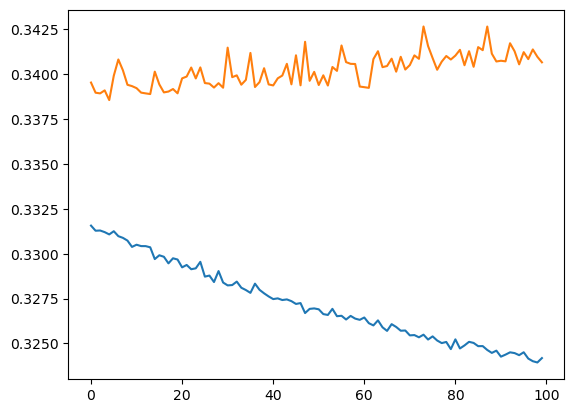

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

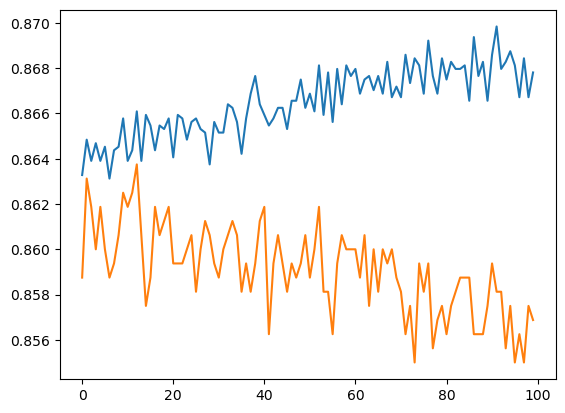

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])